# Time Series Smoothing Moving Average and Exponential Smoothing

Kaggle: https://www.kaggle.com/datasets/kandij/electric-production

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from pylab import rcParams
rcParams['figure.figsize'] = 20, 5

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/data_ts/Electric_Production.csv', index_col=0)

In [4]:
df.shape

(397, 1)

In [5]:
df.head()

,Value
DATE,
01-01-1985,72.5052
02-01-1985,70.6720
03-01-1985,62.4502
04-01-1985,57.4714
05-01-1985,55.3151


In [6]:
df.tail()

,Value
DATE,
09-01-2017,98.6154
10-01-2017,93.6137
11-01-2017,97.3359
12-01-2017,114.7212
01-01-2018,129.4048


In [7]:
df.columns

Index(['Value'], dtype='object')

# Moving average method

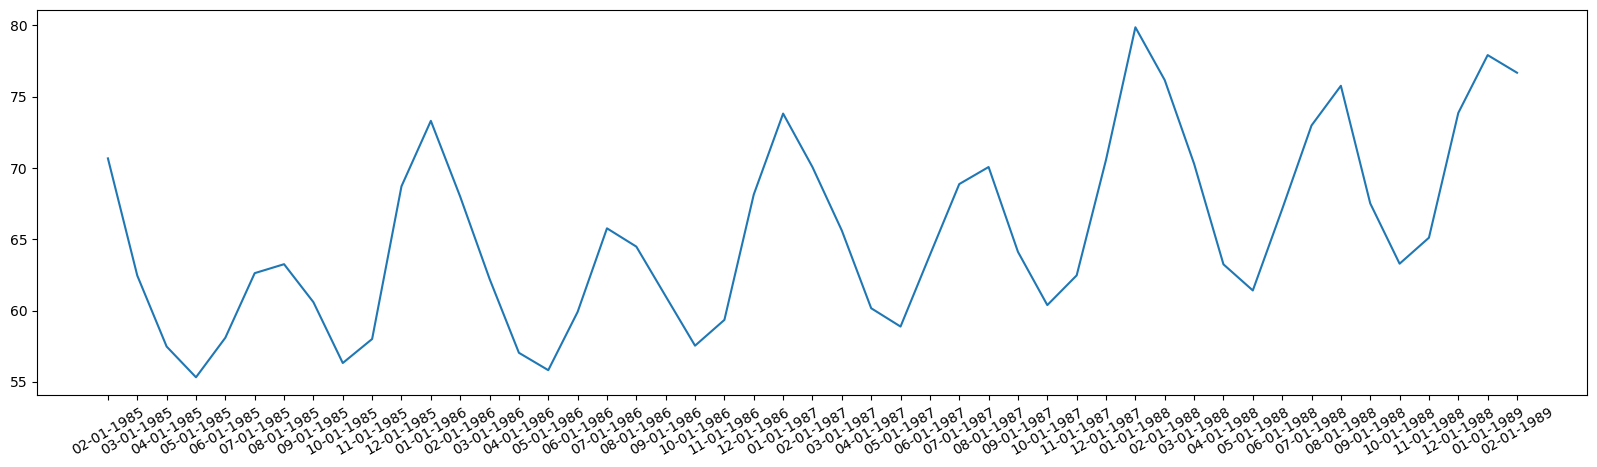

In [8]:
plt.plot(df[1:50]['Value'])
plt.xticks(rotation=30)
plt.show()

* Seasonality - peak around Nov Dec
* Trend - upper

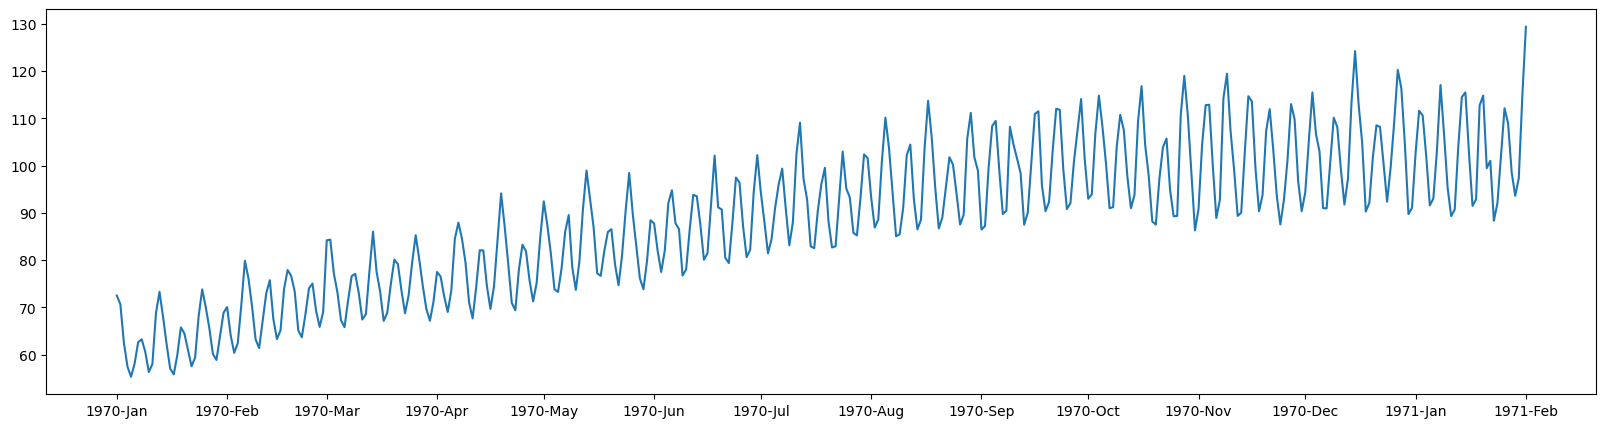

In [9]:
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%Y-%b')

plt.plot(df['Value'])
X = plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(fmt)

plt.show()

In [10]:
# rolling average transform
rollingseries = df[1:50].rolling(window=5)

rollingmean = rollingseries.mean() # find rolling mean MA(5)

In [11]:
rollingmean.head(10)

,Value
DATE,
02-01-1985,NaN
03-01-1985,NaN
04-01-1985,NaN
05-01-1985,NaN
06-01-1985,60.79982
07-01-1985,59.18946
08-01-1985,59.34912
09-01-1985,59.97176
10-01-1985,60.17182


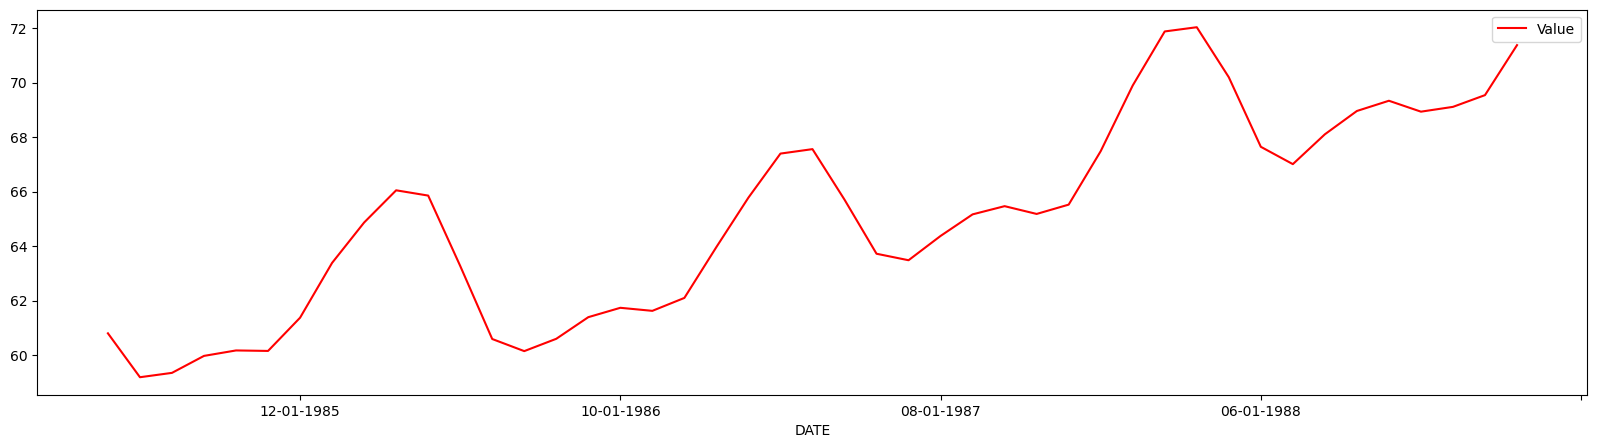

In [12]:
# plot transformed dataset
rollingmean.plot(color='red')
plt.show()

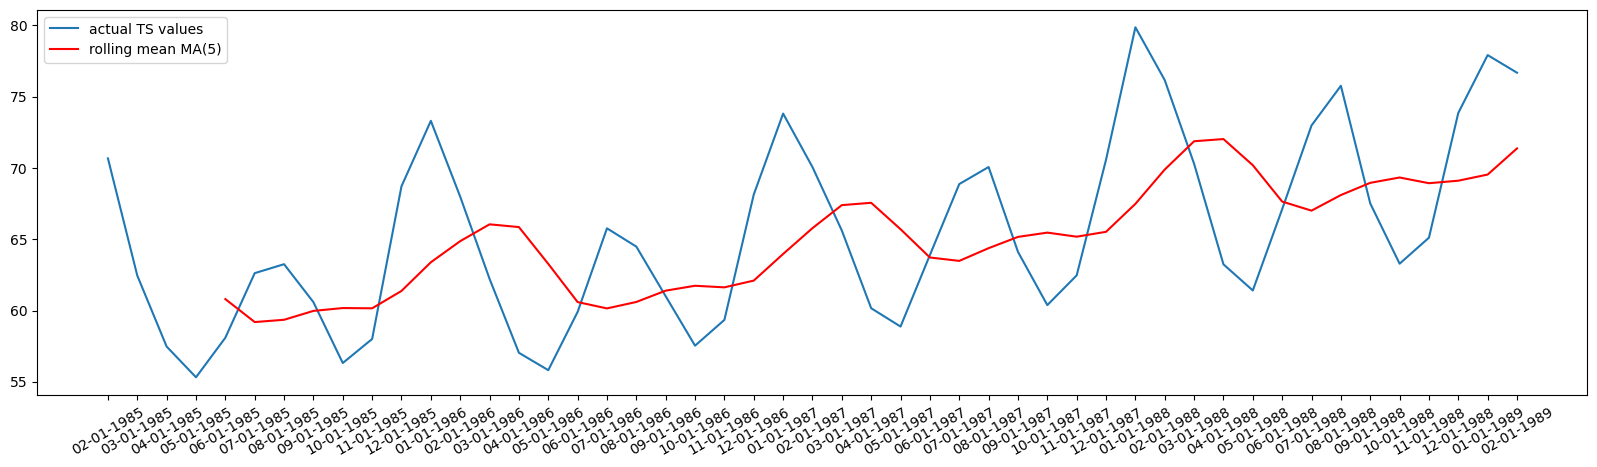

In [13]:
plt.plot(df[1:50]['Value'], label='actual TS values')
plt.plot(rollingmean, color='red', label='rolling mean MA(5)')
plt.xticks(rotation=30)
plt.legend()
plt.show()

In [14]:
# rolling average transform
rollingseries = df[1:50].rolling(window=10)

rollingmean_ma10 = rollingseries.mean() # find rolling mean MA(10)

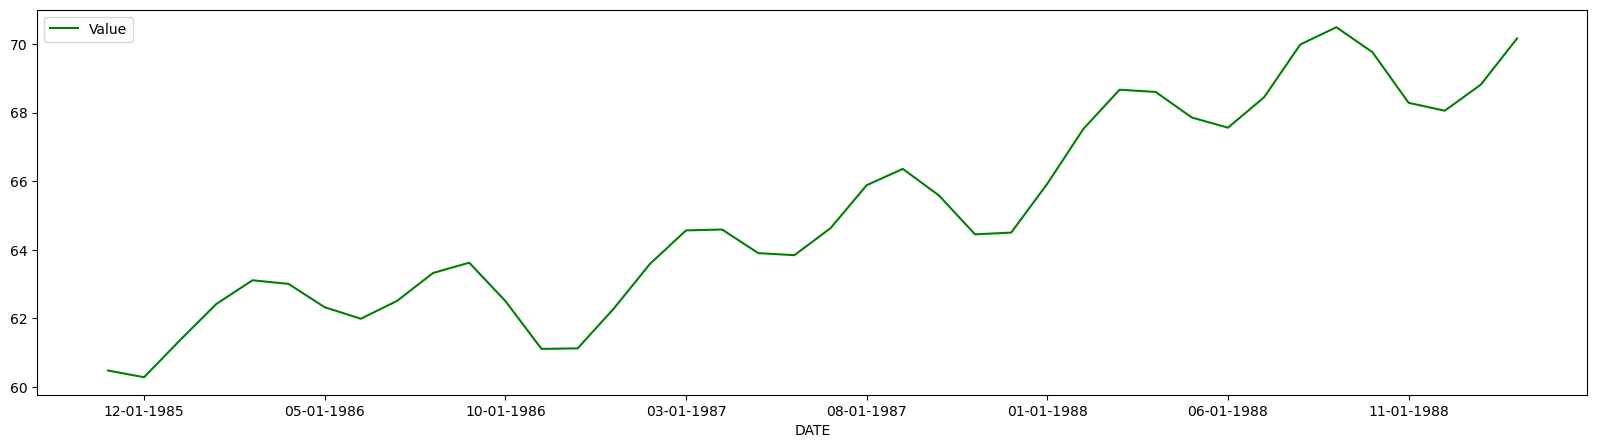

In [15]:
# plot transformed dataset
rollingmean_ma10.plot(color='green')
plt.show()

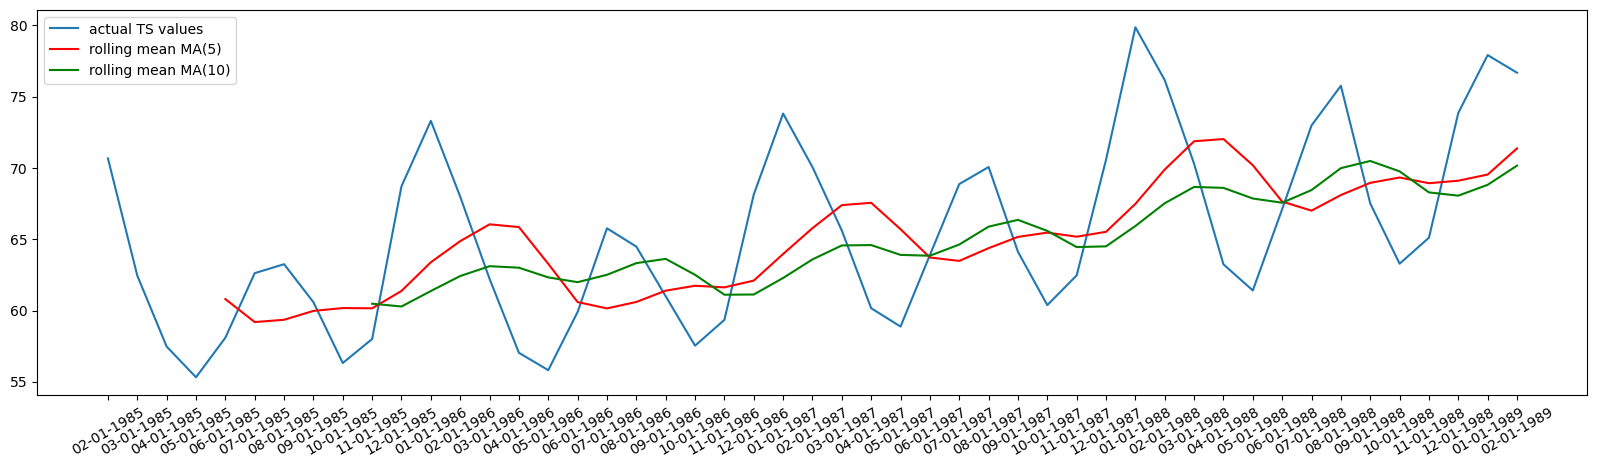

In [16]:
plt.plot(df[1:50]['Value'], label='actual TS values')
plt.plot(rollingmean, color='red', label='rolling mean MA(5)')
plt.plot(rollingmean_ma10, color='green', label='rolling mean MA(10)')
plt.xticks(rotation=30)
plt.legend()
plt.show()

# Simple Exponential Smoothing

In [17]:
# Exponential smoothing-single

data = df[1:50]

fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fit2 = SimpleExpSmoothing(data).fit(smoothing_level=0.8, optimized=False) # more weight on more recent observations

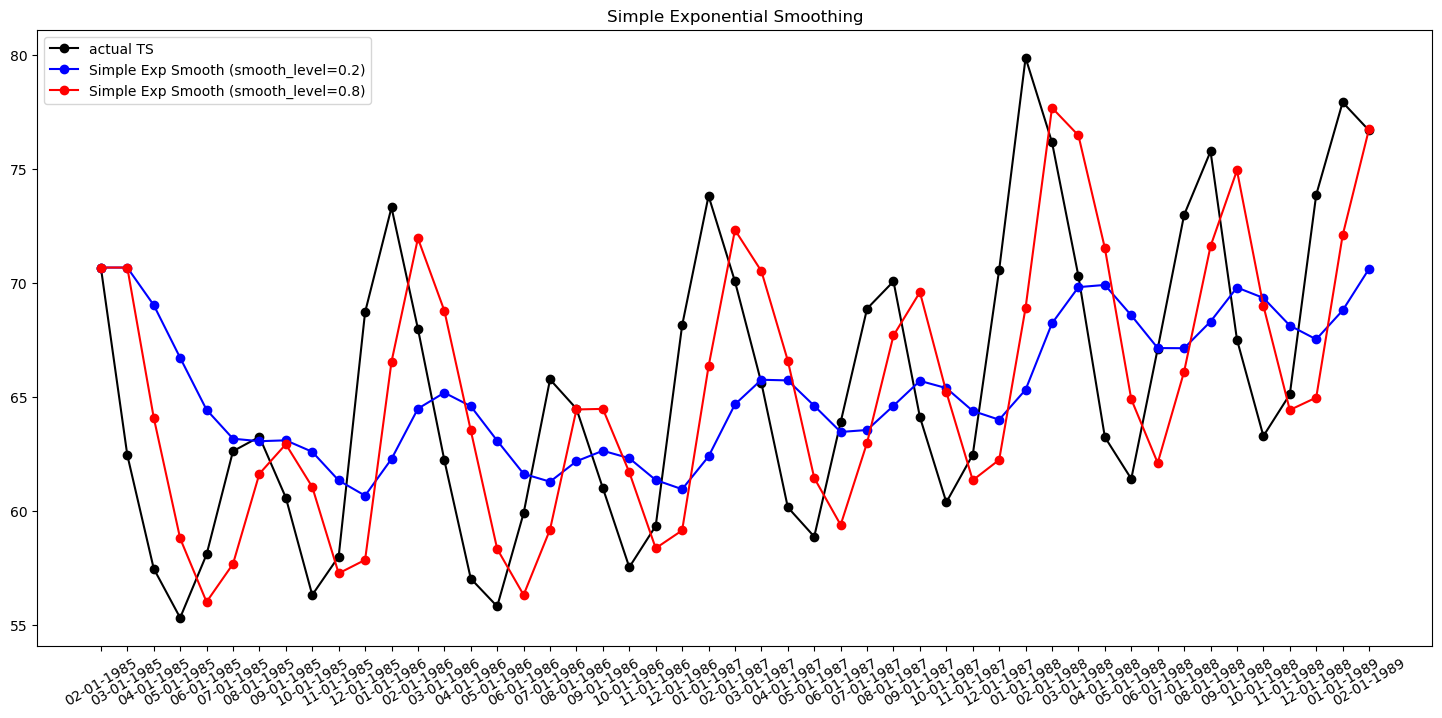

In [18]:
plt.figure(figsize=(18,8))
plt.plot(data, marker='o', color='black', label='actual TS')
plt.plot(fit1.fittedvalues, marker='o', color='blue', label='Simple Exp Smooth (smooth_level=0.2)')
plt.plot(fit2.fittedvalues, marker='o', color='red', label='Simple Exp Smooth (smooth_level=0.8)')

plt.title('Simple Exponential Smoothing')
plt.xticks(rotation=30)
plt.legend()
plt.show()

# Holt method for exponential smoothing

In [19]:
fit1 = Holt(data).fit() # linear trend

fit2 = Holt(data, exponential=True).fit() # exponential trend

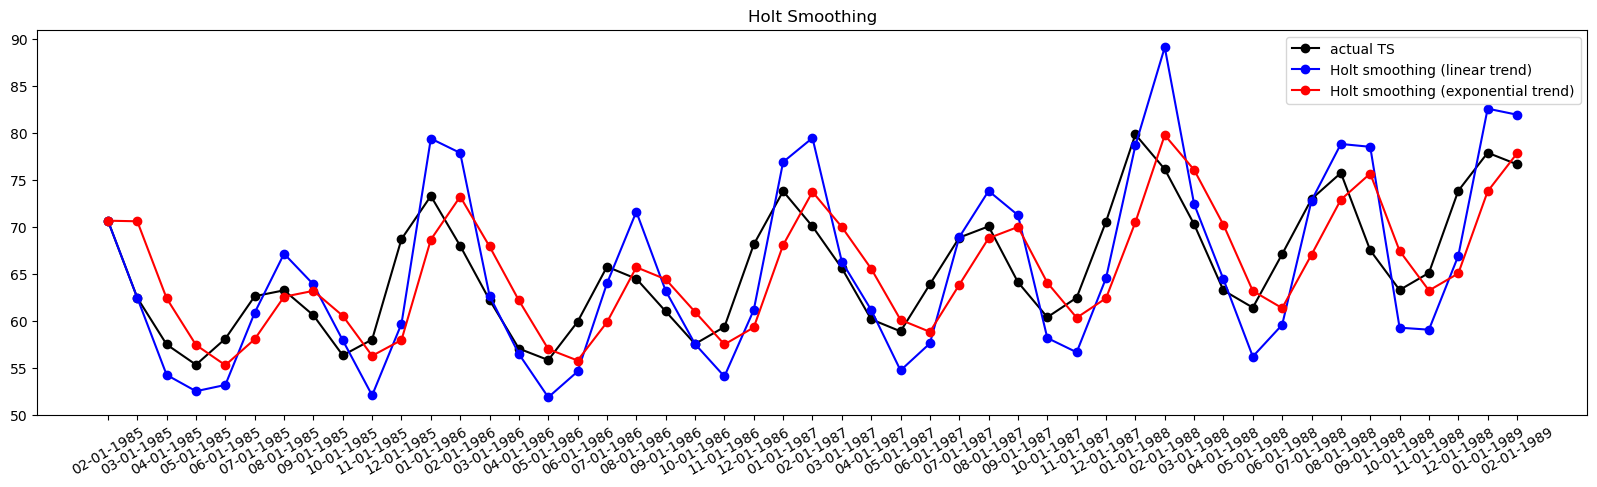

In [20]:
plt.plot(data, marker='o', color='black', label='actual TS')
plt.plot(fit1.fittedvalues, marker='o', color='blue', label='Holt smoothing (linear trend)')
plt.plot(fit2.fittedvalues, marker='o', color='red', label='Holt smoothing (exponential trend)')

plt.title('Holt Smoothing')
plt.xticks(rotation=30)
plt.legend()
plt.show()